<a href="https://colab.research.google.com/github/Whats-In-My-Vape/effective-Data-Mining-2/blob/master/03_Feature_Engineering___Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering - Churn

## Load Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="whitegrid")
sns.set_context("notebook")

In [0]:
from IPython.display import Markdown, display

OUT = "output"
import os
os.makedirs(OUT, exist_ok=True)
SHOW_PLOTS = False
TRAIN_TEST_SEED = 42

In [0]:
# utility funciton for typesetting percentages
display_fraction = lambda n,d: (n/d*100, n, d)

## Load and Prepare the Data 

I have made a slight change of naming convention which will simply code below - and also avoid mistakes in lab sessions when I rerun cells out of order to demo parts of the code.   Rather than using __df__ to store the full dataset I will use __df_all__, and use __df__ as an alias for various dataset as needed - see [Feature Engineering](#Feature_Engineering). So will try to follow naming convention:

 * __df__ alias for various datasets (trwated link a tmp variable, more later). 
 * __df_all__ full dataset after loading and prepped (columns renamed, value recoded).
 * __df_model__ dataset with target and a subset of the original attributes that may appear in model or be used to construct other attributes.
 * __df_train__ dataset 
 * __df_test__ dataset 

 


In [53]:
df_churn = pd.read_csv("churn.csv")
print("Churn", df_churn.shape)
df_states = pd.read_csv("states.csv")
print("States", df_states.shape)

df_all = df_churn.merge(df_states, on="State")

message = (" * Data set consists of %d cases (rows) with %s attributes (cols) and a single target."  
% (df_all.shape[0], df_all.shape[1]-1))
Markdown(message)

Churn (3333, 16)
States (52, 4)


 * Data set consists of 3333 cases (rows) with 18 attributes (cols) and a single target.

In [54]:
df_all.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Churn,Latitude,Longitude,Name
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,no,39.011902,-98.484246,Kansas
1,KS,70,408,no,no,0,232.1,122,292.3,112,201.2,112,0.0,0,3,no,39.011902,-98.484246,Kansas
2,KS,92,408,yes,no,0,62.6,111,180.6,126,221.7,80,10.4,2,1,yes,39.011902,-98.484246,Kansas
3,KS,137,408,no,no,0,205.9,88,209.3,86,289.9,84,14.5,4,2,no,39.011902,-98.484246,Kansas
4,KS,132,415,no,no,0,83.4,110,232.2,137,146.7,114,7.6,5,1,no,39.011902,-98.484246,Kansas


Replace the binary target and the two binary features with numerical values.

In [0]:
for c in ["Intl_Plan", "VMail_Plan", "Churn"]:
    if df_all[c].dtype == 'object':
        df_all[c] = df_all[c].map( {"no":0, "yes":1} )

In [56]:
df_all.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Churn,Latitude,Longitude,Name
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,39.011902,-98.484246,Kansas
1,KS,70,408,0,0,0,232.1,122,292.3,112,201.2,112,0.0,0,3,0,39.011902,-98.484246,Kansas
2,KS,92,408,1,0,0,62.6,111,180.6,126,221.7,80,10.4,2,1,1,39.011902,-98.484246,Kansas
3,KS,137,408,0,0,0,205.9,88,209.3,86,289.9,84,14.5,4,2,0,39.011902,-98.484246,Kansas
4,KS,132,415,0,0,0,83.4,110,232.2,137,146.7,114,7.6,5,1,0,39.011902,-98.484246,Kansas


In [0]:
# save data for comparision with R model 
if False:
    target = "Churn"
    from sklearn.model_selection import train_test_split
    df_train, df_test = train_test_split(df_all, stratify=df_all[target], test_size=.25, random_state=666)
    open ("data/churn_train.csv", "wt").write(df_train.to_csv())
    open ("data/churn_test.csv", "wt").write(df_test.to_csv())

## Pre-Processing Data

In [0]:
target = "Churn"
attributes = df_all.columns.tolist()
attributes.remove(target) 

df_model = df_all.loc[:, attributes + [target]]

### Side Note - Down-Sampling 

When a dataset is imbalanced, one can generate a balanced dataset by taking a sample of the larger set.

In [0]:
#df_balanced_down_sampling = pd.concat ([
#    df_all[df_all.Churn==0].sample(n=sum(df_all.Churn==1), random_state=TRAIN_TEST_SEED),
#    df_all[df_all.Churn==1]])

### Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_model, stratify=df_model[target], test_size=.50, random_state=TRAIN_TEST_SEED)

## Feature_Engineering 

Features engineering and selection decision is carried out on __df_train__ ONLY, but resulting operations should be applied to both __df_train__ and __df_test__. The simplest way to do this (without repeating code) is to apply operations to __df_model__ and repeat the train/test split USING THE SAME SEED.

### New Feature - Cranky Triskaidekaphobias

Would a feature indicating customers who complain and avoid the number 13 be useful in predicting Churn?

This is a silly feature, but illustrates the general procedure

In [61]:
my_query = df_model.query('Cust_Serv_Calls>0 & Day_Calls!=13 & Eve_Calls!=13 & Night_Calls!=13 & Intl_Calls!=13')
my_query.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Latitude,Longitude,Name,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,39.011902,-98.484246,Kansas,0
1,KS,70,408,0,0,0,232.1,122,292.3,112,201.2,112,0.0,0,3,39.011902,-98.484246,Kansas,0
2,KS,92,408,1,0,0,62.6,111,180.6,126,221.7,80,10.4,2,1,39.011902,-98.484246,Kansas,1
3,KS,137,408,0,0,0,205.9,88,209.3,86,289.9,84,14.5,4,2,39.011902,-98.484246,Kansas,0
4,KS,132,415,0,0,0,83.4,110,232.2,137,146.7,114,7.6,5,1,39.011902,-98.484246,Kansas,0


In [62]:
df_model["Cranky_Triskaidekaphobias"] = df_model.apply (lambda row: (row.Cust_Serv_Calls>0 
           and row.Day_Calls!=13 and row.Eve_Calls!=13 
           and row.Night_Calls!=13 and row.Intl_Calls!=13), axis=1)
df_model.Cranky_Triskaidekaphobias.value_counts(dropna=False)

True     2626
False     707
Name: Cranky_Triskaidekaphobias, dtype: int64

### New Feature - ????

### New Feature - ????

In [63]:
my_query = df_model.query('Eve_Mins+Night_Mins')
my_query.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3202: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  new_data = self.loc[res]


,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Latitude,Longitude,Name,Churn,Cranky_Triskaidekaphobias
442.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_model["All_Mins"]=df_model.apply(lambda row:(row.Day_Mins and row.Eve_Mins and row.Night_Mins and row.Intl_Mins),axis=1)
df_model.All_Mins.value_counts(dropna=False)


10.0    62
11.3    59
9.8     56
10.9    56
10.1    53
        ..
17.2     1
1.3      1
18.4     1
3.4      1
2.7      1
Name: All_Mins, Length: 162, dtype: int64

### New Feature - ????

In [0]:
#df_model["magic"]=df_model.apply(lambda r:())


In [65]:
df_model['boo']=df_model.apply(lambda v:(v.Account_Length>=127 and v.VMail_Plan==0 + v.Intl_Plan==0),axis=1)
df_model.boo.value_counts(dropna=True)

False    2779
True      554
Name: boo, dtype: int64

In [66]:
df_model['percentofcalls']=df_model.apply(lambda f:(f.All_Mins if(f.Cust_Serv_Calls>3)else f.Cust_Serv_Calls==4>9),axis=1)
df_model.percentofcalls.value_counts(dropna=False)


False    3068
11.5        9
9.7         9
10.3        8
9.2         7
         ... 
9.8         1
4.7         1
4.1         1
14.5        1
12.9        1
Name: percentofcalls, Length: 101, dtype: int64

In [67]:
df_model["concats"]=df_model.apply(lambda k:(k.VMail_Plan==1 and k.VMail_Message<=20),axis=1)
df_model.concats.value_counts()


False    3224
True      109
Name: concats, dtype: int64

In [68]:
df_model['totandintl']=df_model.apply(lambda d:(d.All_Mins + d.boo),axis=1)
df_model.totandintl.value_counts(dropna=False)

11.3    62
10.0    58
11.0    58
9.8     56
11.1    56
        ..
3.9      1
2.7      1
16.8     1
19.3     1
17.9     1
Name: totandintl, Length: 162, dtype: int64

### New Feature - ????

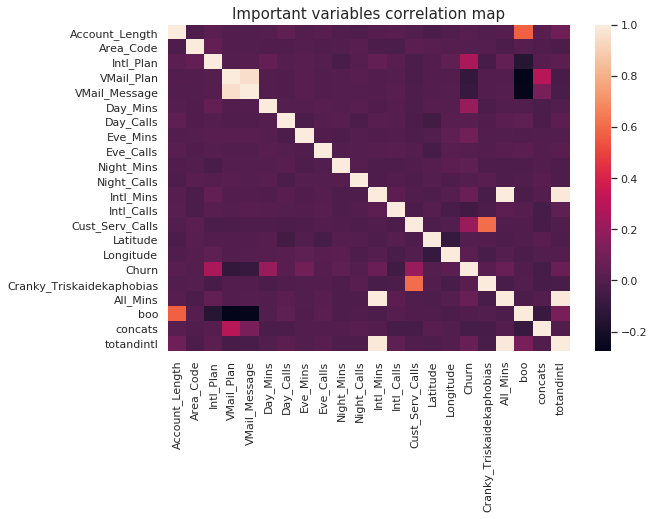

In [69]:
# This thing kinda helps as if the params for feature are wrong it blinds you :)

corrmat = df_model.corr(method='pearson')
f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(corrmat,annot=False, vmax=1., fmt=".2f", square=False)
plt.title("Important variables correlation map", fontsize=15)
plt.show()


### New Feature - ????

### New Feature - ????

## Model Training

In [70]:
print (df_model.columns.values)

['State' 'Account_Length' 'Area_Code' 'Intl_Plan' 'VMail_Plan'
 'VMail_Message' 'Day_Mins' 'Day_Calls' 'Eve_Mins' 'Eve_Calls'
 'Night_Mins' 'Night_Calls' 'Intl_Mins' 'Intl_Calls' 'Cust_Serv_Calls'
 'Latitude' 'Longitude' 'Name' 'Churn' 'Cranky_Triskaidekaphobias'
 'All_Mins' 'boo' 'percentofcalls' 'concats' 'totandintl']


### Train-Test Split

REPEAT train/test split from above so that both data subsets have the modified feature set.

In [71]:
df_train, df_test = train_test_split(df_model, stratify=df_model[target], test_size=.50, random_state=TRAIN_TEST_SEED)
attributes = df_model.columns.tolist()
attributes.remove(target)
for column in ["State", "longitude", "latitude"]:
    if column in attributes: attributes.remove(column)
print(attributes)

['Account_Length', 'Area_Code', 'Intl_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Eve_Mins', 'Eve_Calls', 'Night_Mins', 'Night_Calls', 'Intl_Mins', 'Intl_Calls', 'Cust_Serv_Calls', 'Latitude', 'Longitude', 'Name', 'Cranky_Triskaidekaphobias', 'All_Mins', 'boo', 'percentofcalls', 'concats', 'totandintl']


In [72]:
df_model.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Latitude,Longitude,Name,Churn,Cranky_Triskaidekaphobias,All_Mins,boo,percentofcalls,concats,totandintl
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,39.011902,-98.484246,Kansas,0,True,10.0,False,False,False,10.0
1,KS,70,408,0,0,0,232.1,122,292.3,112,201.2,112,0.0,0,3,39.011902,-98.484246,Kansas,0,True,0.0,False,False,False,0.0
2,KS,92,408,1,0,0,62.6,111,180.6,126,221.7,80,10.4,2,1,39.011902,-98.484246,Kansas,1,True,10.4,False,False,False,10.4
3,KS,137,408,0,0,0,205.9,88,209.3,86,289.9,84,14.5,4,2,39.011902,-98.484246,Kansas,0,True,14.5,True,False,False,15.5
4,KS,132,415,0,0,0,83.4,110,232.2,137,146.7,114,7.6,5,1,39.011902,-98.484246,Kansas,0,True,7.6,True,False,False,8.6


In [0]:
attributes = df_model.columns.tolist()
for c in ["Churn", "State", "Name"]: 
    if c in attributes: attributes.remove(c)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(df_train.loc[:,attributes].astype(float))
y_train = df_train.Churn.values

X_test = scaler.transform(df_test.loc[:,attributes].astype(float))
y_test = df_test.Churn.values

### Evaluation

We spoke about the AUC metric last week. This week we will focus on recall - it is easier and probably more relevant in this case and we want to focus on identifying as many Churn customers as possible.

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_auc_score

models = []

### Training - First Iteration

Just fix a few of our standard classifiers, using default/semi-sane parameters.

#### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
models.append( {"name":"LogisticRegression", "ref": LogisticRegression(solver="lbfgs")} )

#### Support Vector Machines

In [0]:
from sklearn.svm import SVC
models.append( {"name":"SVC", "ref":SVC(gamma="scale")} )

#### Decision Trees

In [0]:
from sklearn.tree import DecisionTreeClassifier
models.append( {"name":"DT (prunned=4)", "ref":DecisionTreeClassifier(criterion='entropy', max_depth=4)} )

In [78]:
for model in models:
    
    crossval_scores = cross_val_score(model["ref"], X_train, y_train, scoring='recall', cv=5)
    print ("\nModel %s" % model["name"])
    print ("\tCV scores %s" % crossval_scores)
    print ("\tmean=%.3f std=%.3f" % (crossval_scores.mean(), crossval_scores.std()))


Model LogisticRegression
	CV scores [0.14285714 0.25       0.3125     0.14583333 0.27083333]
	mean=0.224 std=0.068

Model SVC
	CV scores [0.36734694 0.4375     0.45833333 0.35416667 0.5       ]
	mean=0.423 std=0.055

Model DT (prunned=4)
	CV scores [0.36734694 0.58333333 0.5625     0.39583333 0.54166667]
	mean=0.490 std=0.090


### Feature Selection

In [0]:
df_train, df_test = train_test_split(df_model, stratify=df_model[target], test_size=.25, random_state=TRAIN_TEST_SEED)

X_train = scaler.fit_transform(df_train.loc[:,attributes].astype(float))

y_train = df_train.Churn.values

X_test = scaler.transform(df_test.loc[:,attributes].astype(float))
y_test = df_test.Churn.values

Optimal number of features : 5


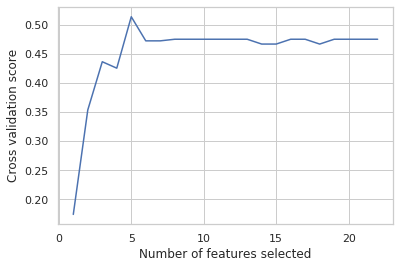

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

model = models[2]["ref"]

rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2), scoring="recall")
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [81]:
# list of features selected
attributes_selected = np.array(attributes)[rfecv.support_].tolist()
attributes_selected

['Intl_Plan', 'Day_Mins', 'Eve_Mins', 'All_Mins', 'percentofcalls']

### Training - After Feature Selection

In [82]:
TRAIN_TEST_SEED = 42

df_model_fs = df_model.loc[:, attributes_selected + [target]]
display(df_model_fs.head())

# train-test split
df_train_fs, df_test_fs = train_test_split(df_model_fs, stratify=df_model_fs[target], test_size=.25, random_state=TRAIN_TEST_SEED)
attributes = df_model_fs.columns.tolist()
attributes.remove(target)

# normalise 
X_train = scaler.fit_transform(df_train.loc[:,attributes].astype(float))
y_train = df_train.Churn.values
X_test = scaler.transform(df_test.loc[:,attributes].astype(float))
y_test = df_test.Churn.values

for model in models:
    
    crossval_scores = cross_val_score(model["ref"], X_train, y_train, scoring='recall', cv=5)
    print ("\nModel %s" % model["name"])
    print ("\tCV scores %s" % crossval_scores)
    print ("\tmean=%.3f std=%.3f" % (crossval_scores.mean(), crossval_scores.std()))

,Intl_Plan,Day_Mins,Eve_Mins,All_Mins,percentofcalls,Churn
0,0,265.1,197.4,10.0,False,0
1,0,232.1,292.3,0.0,False,0
2,1,62.6,180.6,10.4,False,1
3,0,205.9,209.3,14.5,False,0
4,0,83.4,232.2,7.6,False,0



Model LogisticRegression
	CV scores [0.15277778 0.11111111 0.16438356 0.23287671 0.25      ]
	mean=0.182 std=0.052

Model SVC
	CV scores [0.5        0.44444444 0.52054795 0.43835616 0.47222222]
	mean=0.475 std=0.032

Model DT (prunned=4)
	CV scores [0.51388889 0.44444444 0.45205479 0.49315068 0.52777778]
	mean=0.486 std=0.033
